# Investigation of the Titanic Data by Jennifer Penuelas

The dataset this analysis is studying is that of the Titanic passengers, provided and described from Kaggle. The variables describing each passenger include:
* PassengerId 
* Survived - where a value of 0 means no and a value of 1 means yes
* Pclass - values are the numbers one two and three denoting upper, middle, and lower class respectively
* Name
* Sex
* Age - those below a year old were estimated by a float
* SibSp - how many siblings and/or spouses the passenger had onboard (excludes mistresses and fiancés)
* Parch - how many parents and/or children the passenger had onboard (includes step-siblings)
* Ticket
* Fare
* Cabin
* Embarked - values are C, Q, and S for Cherbourg, Queenstown, and Southampton respectively

This analysis compares the differences in family, survival, location, and fare between different classes in an attempt to answer the following questions: 
> Who was most likely to survive the Titanic shipwreck? Which factors seemed to contribute most to their survival?
> How large were family sizes, ie. how many slibings, spouses, children, and parents did different passengers have.

## Extracting the Data 

In [1]:
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#The following block of code takes the titanic-data.csv file and saves all information in a pandas dataframe then 
#it fills the missing values contained in the Age and Cabin columns of the data frame and fills the NaNs with -0.0 
#and the string missing00 in each column, respectively. Then it outputs the first 5 rows of the dataframe. 
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data['Age'].fillna(-0.0, inplace=True)
titanic_data['Cabin'].fillna('missing00', inplace=True)
titanic_data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing00,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing00,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing00,S


**Note, the original data was altered in the following manner:** 
* The Sex column had missing values that were changed to be -0.0. The reason behind doing this and not using the average or median of the ages for example was to keep the missing values distinct from the known values and writing 0 as a negative float achieved this in the best way for my purposes. Using average or median are both plausible methods and issues arising from my implementation are addressed when they arise. 
* The Cabin column also had missing values which I changed simply to address this issue though it is unnecessary since this analysis does not look at or explore data involving the cabin values. The value I changed NaN to was the string missing00 to firstly keep the object the same as all other cabin value objects and to also keep the general cabin value format of letters followed by numbers.

## Relating Class to Survival

In [3]:
#Save the total number of passengers in each class in total_class_counts and the total number of survivors within
#each class in survivors_per_class, then concatenate the two series to create one dataframe in which the indeces 
#specify the class values, one, two, and three, and the columns are Pclass and Survived in which the values of 
#tell you the total number of passengers per Pclass and the total number of Survivors per class.
total_class_counts = titanic_data['Pclass'].value_counts()
survivors_per_class = titanic_data.groupby('Pclass').sum()['Survived']
class_and_survival_numbers = pd.concat([total_class_counts, survivors_per_class], axis=1)
class_and_survival_numbers

,Pclass,Survived
1,216,136
2,184,87
3,491,119


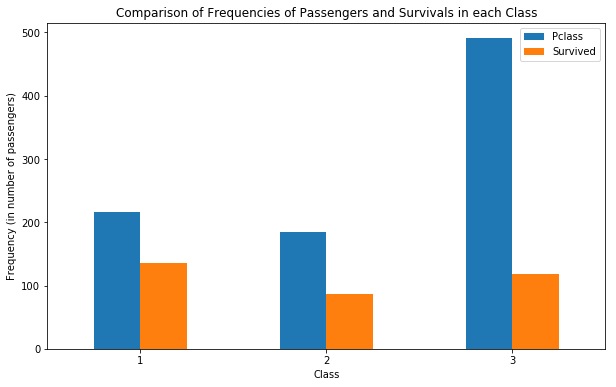

In [4]:
#Code to graph the above information and to set the axis names and graph title. 
class_and_survival_graph = class_and_survival_numbers.plot(kind='bar', figsize=(10, 6), 
                                title='Comparison of Frequencies of Passengers and Survivals in each Class')
class_and_survival_graph.update({'xlabel':'Class', 'ylabel':'Frequency (in number of passengers)'})
class_and_survival_graph.set_xticklabels(class_and_survival_graph.get_xmajorticklabels(), rotation=0)

The total number of passengers aboard the Titanic was 891, a proportion of 0.55 were lower class passengers, 0.21 were middle class passengers, and 0.24 were upper class passengers. Out of all passengers, there were 342 survivors, this consititutes a proportion of 0.38 surviving passengers. Then out of all of the survivors 0.40 were upper class, 0.25 were middle class, and 0.35 were lower class. This means that out of all upper class passengers 0.63 of them survived, out of all middle class passengers 0.47 survived, and out of lower class passengers 0.24 survived. You can compare the number of survivals per class to the total number of passengers in each class in the graph above. It is clear that the survivals per class is skewed in favor of upper class passengers, as the green bar is closer to the total amount for upper class passengers. This implies that class was correlated with survival, but just how strong is this correlation?  

### Pearson's r for Class and Survival

In [5]:
#This code filters the whole dataframe into only the Survival and Pclass columns, saving these columns in a variable
#called survived_and_pclass which we then use to calculate Pearson's r to quantify the correlation between class and 
#survival.
survived_and_pclass = titanic_data.filter(['Survived', 'Pclass'], axis=1)
survived_and_pclass.corr(method='pearson')

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


According to the table above, Pearson's r describing the correlation between survival and class is equal to -0.34. This number seems to be lower than expected compared to the proportions of survivals within each class.  

## Pearson's r for more Variables Compared to Survival

### Survival and Age

In [6]:
#Code filters the original dataframe into the two columns Survived and Age, saving the columns into the variable
#survived_and_age, the used to calculate Pearson's r to quantify the correlation between age and survival.
survived_and_age = titanic_data.filter(['Survived', 'Age'], axis=1)
survived_and_age.corr(method='pearson')

,Survived,Age
Survived,1.000000,0.010539
Age,0.010539,1.000000


In [7]:
#The following code makes a new series called survivors_per_age_range which describes how many survivors there are 
#within a specific age range, described as being equal to or less than the index value but greater than the previous 
#index value. This specific series has an age range of 5 years. The purpose of building this Series is to be able to
#display the values as a histogram.
min_age = survived_and_age['Age'].min()
max_age = survived_and_age['Age'].max()
num_bins = (max_age - min_age) / 5 #5 being the bin size I want
survivors_per_age_range = pd.Series(data=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                                    index=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80], 
                                    name='Survivors of Age Equal to or Less Than the Index Value')
for i in range(len(survived_and_age)):
    if survived_and_age.loc[i, 'Survived'] == 1:
        if survived_and_age.loc[i, 'Age'] <= 5:
            survivors_per_age_range[5] += 1
        elif survived_and_age.loc[i, 'Age'] <= 10:
            survivors_per_age_range[10] += 1
        elif survived_and_age.loc[i, 'Age'] <= 15:
            survivors_per_age_range[15] += 1
        elif survived_and_age.loc[i, 'Age'] <= 20:
            survivors_per_age_range[20] += 1
        elif survived_and_age.loc[i, 'Age'] <= 25:
            survivors_per_age_range[25] += 1
        elif survived_and_age.loc[i, 'Age'] <= 30:
            survivors_per_age_range[30] += 1
        elif survived_and_age.loc[i, 'Age'] <= 35:
            survivors_per_age_range[35] += 1
        elif survived_and_age.loc[i, 'Age'] <= 40:
            survivors_per_age_range[40] += 1
        elif survived_and_age.loc[i, 'Age'] <= 45:
            survivors_per_age_range[45] += 1
        elif survived_and_age.loc[i, 'Age'] <= 50:
            survivors_per_age_range[50] += 1
        elif survived_and_age.loc[i, 'Age'] <= 55:
            survivors_per_age_range[55] += 1
        elif survived_and_age.loc[i, 'Age'] <= 60:
            survivors_per_age_range[60] += 1
        elif survived_and_age.loc[i, 'Age'] <= 65:
            survivors_per_age_range[65] += 1
        elif survived_and_age.loc[i, 'Age'] <= 70:
            survivors_per_age_range[70] += 1
        elif survived_and_age.loc[i, 'Age'] <= 75:
            survivors_per_age_range[75] += 1
        else:
            survivors_per_age_range[80] += 1
        
survivors_per_age_range

5     83
10     7
15    11
20    33
25    42
30    42
35    41
40    28
45    17
50    16
55    10
60     7
65     4
70     0
75     0
80     1
Name: Survivors of Age Equal to or Less Than the Index Value, dtype: int64

In [8]:
survivors_per_age_range.describe()

count    16.000000
mean     21.375000
std      22.422831
min       0.000000
25%       6.250000
50%      13.500000
75%      35.000000
max      83.000000
Name: Survivors of Age Equal to or Less Than the Index Value, dtype: float64

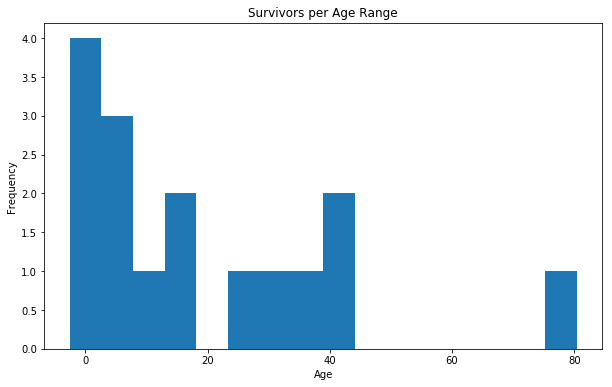

In [9]:
#Code to plot the information describing the number of survivors per age range
age_plot = survivors_per_age_range.plot(kind='hist', bins=16, figsize=(10, 6), align='left',
                                        title='Survivors per Age Range')
age_plot.set_xlabel('Age')

The above histogram was trying to give a visualization for how many survivors there were for different age ranges to see how age and survival were correlated. As expected from Pearson's r, we do not expect a strong correlation between the two since the value was close to 0. Exclude the column counting the survivors aged 0 thru 5, since this column could be larger than it actually is since unknown age values in the data were changed to be a value of -0.0. From the plot and the output of the series itself, we see that there were more younger survivors than older survivors, with only one survivor over 65 years old. However, out of the younger survivors there is no implication strong enough to say that 20 year olds tended to survive more than 40 year olds, for example.    

### Survival and Sex

In [10]:
#The following block of code first saves the Survived and Sex columns from the original dataframe into a variable
#named survived_and_sex, this variable is a dataframe object. The purpose of this is to try to calculate Pearson's r 
#to quantify the correlation between sex and survival. The problem however was that the possible values 
#for Sex were the string objects male and female, so the corr() function would not properly calculate Pearson's r. 
#The for loop then serves to go through every entry of the survived_and_sex dataframe and change the value of Sex 
#to either 0 or 1 representing male or female, respectively.
survived_and_sex = titanic_data.filter(['Survived', 'Sex'], axis=1)
for i in range(len(survived_and_sex)):
    if survived_and_sex.loc[i, 'Sex'] == 'male':
        survived_and_sex.set_value(i, 'Sex', 0)
    else:
        survived_and_sex.set_value(i, 'Sex', 1)
survived_and_sex.corr(method='pearson')

,Survived
Survived,1.0


Sex
female    233
male      109
Name: Survived, dtype: int64


[<matplotlib.text.Text at 0x115eb1710>, <matplotlib.text.Text at 0x115ebb610>]

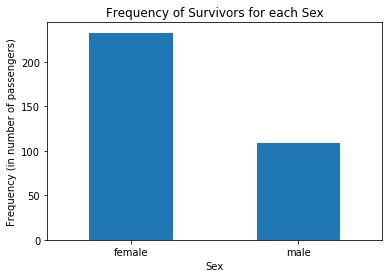

In [11]:
#Code to print the number of survivors for each sex and then plot these numbers as a bar graph.
print titanic_data.groupby('Sex').sum()['Survived']
survivors_per_sex_graph = titanic_data.groupby('Sex').sum()['Survived'].plot(kind='bar',
                                                                             title='Frequency of Survivors for each Sex')
survivors_per_sex_graph.update({'ylabel':'Frequency (in number of passengers)'})
survivors_per_sex_graph.set_xticklabels(survivors_per_sex_graph.get_xmajorticklabels(), rotation=0)

[<matplotlib.text.Text at 0x115f16310>, <matplotlib.text.Text at 0x112782c90>]

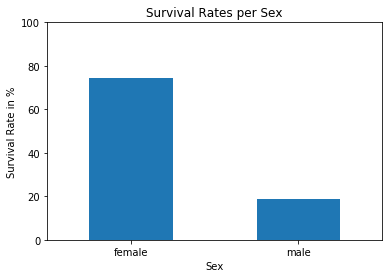

In [12]:
#Code to calculate survival rates per sex then code to plot the survival rates in the form of a bar graph and 
#set the graph and axis titles.
survival_rates = titanic_data.groupby('Sex')['Survived'].mean()*100
surv_rates_graph = survival_rates.plot.bar()
surv_rates_graph.set(title='Survival Rates per Sex', xlabel='Sex', ylabel='Survival Rate in %', ylim=[0, 100])
surv_rates_graph.set_xticklabels(surv_rates_graph.get_xmajorticklabels(), rotation=0)

Sex     female  male
Pclass              
1           91    45
2           70    17
3           72    47


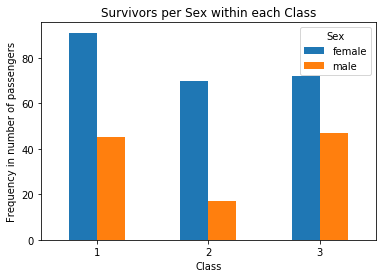

In [13]:
#Code to count the number of survivors per sex within each class and then plot the values in a bar plot. Also, 
#includes code to set the graphs aesthetics.
survivors_per_sex_per_class = titanic_data.groupby(['Pclass', 'Sex']).sum()['Survived'].unstack()
print survivors_per_sex_per_class
surv_per_sex_and_class_graph = survivors_per_sex_per_class.plot.bar()
surv_per_sex_and_class_graph.set(title='Survivors per Sex within each Class',
                                 ylabel='Frequency in number of passengers', xlabel='Class')
surv_per_sex_and_class_graph.legend(title='Sex')
surv_per_sex_and_class_graph.set_xticklabels([1, 2, 3], rotation=0)

The above analysis first attempts to find Pearson's r to quantify the correlation between sex and survival. We first had to extract the survival and sex information from the original data and then change the values of the sex column to integer values so that the correlation function would work appropriately. There was no numerical output for the correlation between sex and survival so we continued to explore the data to see if we could visually infer a correlation. The first two graphs show the frequency and rate of survival per sex, respectively. Both show that there were more female survivors. Then the graph above took this a bit further and explored the differences in survival of each sex within each class and in each class more women survived than men. Also, the graph above strengthens our orignial findings between class and survival were most of the survivors were of first class, followed by lower class, and lastly middle class as this pattern is the same within women of each class. Surprisingly however, is that out of the men of each class more were lower class, winning over the upper class men by only two passengers. This does not imply that men of lower class were more likely to survive than men of upper class however, it was simply interesting to note that the general pattern does break when separating the survivors in each class by their sex.

## Exploring Class Differences

In [14]:
titanic_data.groupby('Pclass').describe()[['SibSp', 'Parch']]

SibSp                                               Parch            \
        count      mean       std  min  25%  50%  75%  max  count      mean   
Pclass                                                                        
1       216.0  0.416667  0.611898  0.0  0.0  0.0  1.0  3.0  216.0  0.356481   
2       184.0  0.402174  0.601633  0.0  0.0  0.0  1.0  3.0  184.0  0.380435   
3       491.0  0.615071  1.374883  0.0  0.0  0.0  1.0  8.0  491.0  0.393075   

                                           
             std  min  25%  50%  75%  max  
Pclass                                     
1       0.693997  0.0  0.0  0.0  0.0  4.0  
2       0.690963  0.0  0.0  0.0  1.0  3.0  
3       0.888861  0.0  0.0  0.0  0.0  6.0

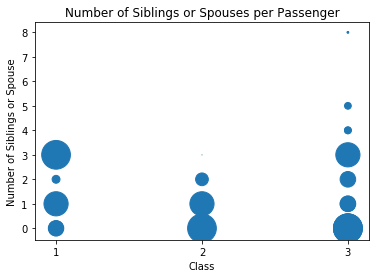

In [15]:
#Code to plot the number of siblings or spouses every passenger of each class has onboard the Titanic. The plot is
#represented by a scatter plot in which the dot size grow if there are more passengers with a certain number of
#siblings or spouses. Then there is some code to set some of the plot aesthetics. 
sibsp_grouping = titanic_data.groupby(['Pclass', 'SibSp'])
sibling_spouse_graph = titanic_data.filter(['Pclass', 'SibSp']).plot(x='Pclass', y='SibSp', kind='scatter',
                                                            s=sibsp_grouping.count()/sibsp_grouping.std())
sibling_spouse_graph.set(title='Number of Siblings or Spouses per Passenger', xlabel='Class',
                 ylabel='Number of Siblings or Spouse')
sibling_spouse_graph.set_xticks([1, 2, 3])

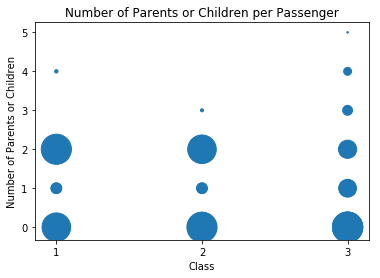

In [20]:
#Code to plot the number of parents or children every passenger of each class has onboard the Titanic. The plot is
#represented by a scatter plot in which the dot size grow if there are more passengers with a certain number of
#parents or children. Then there is some code to set some of the plot aesthetics. 
parch_grouping = titanic_data.groupby(['Pclass', 'Parch'])
parent_child_graph = titanic_data.filter(['Pclass', 'Parch']).plot(x='Pclass', y='Parch', kind='scatter',
                                                            s=parch_grouping.count()/parch_grouping.std())
parent_child_graph.set(title='Number of Parents or Children per Passenger', xlabel='Class',
                 ylabel='Number of Parents or Children')
parent_child_graph.set_xticks([1, 2, 3])

**Note:** The variables `sibsp_grouping` and `parch_grouping` are meant to simplify some repetitive code and the following code `s=sibsp_grouping.count()/sibsp_grouping.std()` and `s=parch_grouping.count()/parch_grouping.std()` are to resize the scatter plot dots so that their sizes represent the amount of passengers in each that have the same number of siblings or spouses and parents or children, respectively. The `std()` function was chosen over `mean()` and `median()` since the outcome fit better in the graph and was easier to visually interpret.  

In [17]:
titanic_data.groupby('Pclass').describe()['Fare']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


The two code blocks above give us data describing family sizes per class as well as fare information per class, respectively. Some of the more interesting values and things to note are first that lower class families tended to be larger than the middle and upper class families and the maximum fare value was $512.33. 

Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


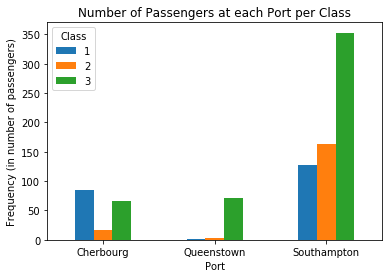

In [18]:
#Code to count the number of passengers that borded the Titanic at each of the three ports, separated by class.
#Then graphed this information in the form of a bar graph.
class_embarkment_counts = titanic_data.groupby(['Embarked', 'Pclass']).size().unstack()
print class_embarkment_counts
embarkment_graph = class_embarkment_counts.plot.bar()
embarkment_graph.set(title='Number of Passengers at each Port per Class',
                     ylabel='Frequency (in number of passengers)', xlabel='Port')
embarkment_graph.legend(title='Class')
embarkment_graph.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'], rotation=0)

The above exploration was an effort to see if we could discover which city was more affluent. It is clear that the most common city of embarkment for all classes was Southhampton. This suggests that Southampton was most likely the biggest city from which the Titanic took port though we cannot say that Southampton was more affluent than any of the other cities since it did not show more upper class passengers. In contrast to this, Queensport did have the most lower class passengers bording with significantly smaller middle and lower class passengers so maybe Queenstown was the poorer city out of the three.  

## Conclusions

   In conclusion, we found that you were more likely to survive the Titanic shipwreck if you were a woman of upper class stature. We found that out of the Titanic survivors, most were upper class passengers then followed by lower class passengers. However, lower class passengers had the smallest proportion of survivors since they constituted the largest proportion of Titanic passengers. Furthermore, we found that out of all survivors most were women. This fact continues when separating the number of male and female survivors in each class. Furthermore, the only outlier in the trend of more upper class passengers surviving than lower class passengers occurs when you separate how many men of each class survived. In this case, lower class men are on top, beating out upper class men by only two passengers. This does not imply that lower class men were more like to survive than upper class men however, since this pattern makes sense as there were more lower class passengers in general. Calculating Pearson's r also showed that class had the highest correlation to survival than any other characteristic with a value of -0.34. 
    
   I wanted to calculate Pearson's r for a combination of different values with survival to numerically see how different passenger characteristics correlated to their survival. However, I was limited to characteristics that had numerical values or those that I could logically transform into a numerical value such as a passenger's sex where I changed the value of being male to 0 and female to 1, then found the correlation. This attempt was not succesful however as it did not produce a numerical value describing the correlation of sex with survival and so instead we had to infer the correlation by looking at various graphs. Out of these correlation values we got that Pearson's r between survival and age was 0.01, a value that is less than the previous value we found comparing class and survival so age is not as greatly correlated to survival as class was. Age did have some values that were originally missing, which I converted into values equal to -0.0. This probably had some effect on Pearson's r, making it closer to 0 than it should be.
   
   I would like to note that I also altered the missing values describing the passenger cabins but since I did not do any exploration with those values they have no effect on the overall conclusions of this analysis.

   Finally ending this on some interesting findings, we found that Southhampton was the most common embarkment city not just in general but among all class types so it was probably the largest city out of the three cities the Titanic borded passengers. Queenstown borded the largest and least amount of lower and upper and middle class passengers, respectively, so it was probably the poorest city. The most expensive fare was $512.33, obviously paid by an upper class passenger, and in general lower class passengers had the largest families on the Titanic with a maximum of 6 siblings and spouses and 8 parents and children. 